# Oasis Infobyte




###### Data Science Internship

###### Intern:Ananddev Singh

###### Task 5 : SALES PREDICTION USING PYTHON

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Cleaning

In [4]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Data Visualization

# Distribution plot

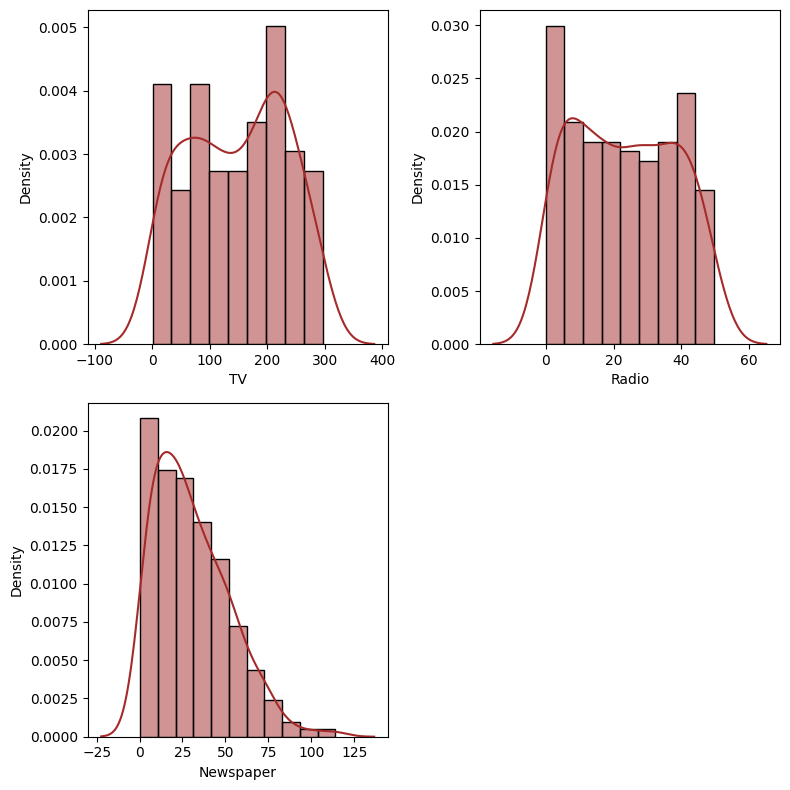

In [11]:
import warnings
warnings.filterwarnings("ignore")

fig=plt.figure(figsize=(8 ,8))

plt.subplot(2 , 2 , 1)
sns.histplot(x=df['TV'], kde=True,
    stat="density", kde_kws=dict(cut=3),color='brown')
plt.xlabel('TV')

plt.subplot(2 , 2 ,2)
sns.histplot(x=df['Radio'],kde=True,
    stat="density", kde_kws=dict(cut=3),color='brown')
plt.xlabel('Radio')

plt.subplot(2 , 2  , 3)
sns.histplot(x=df['Newspaper'],kde=True,
    stat="density", kde_kws=dict(cut=3),color='brown')
plt.xlabel('Newspaper')

plt.tight_layout()

## Jointplot

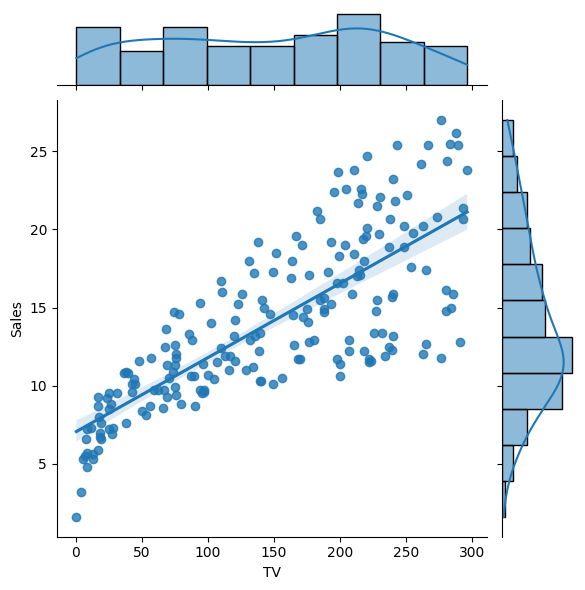

In [12]:
sns.jointplot(x='TV',y='Sales',data = df,kind='reg')

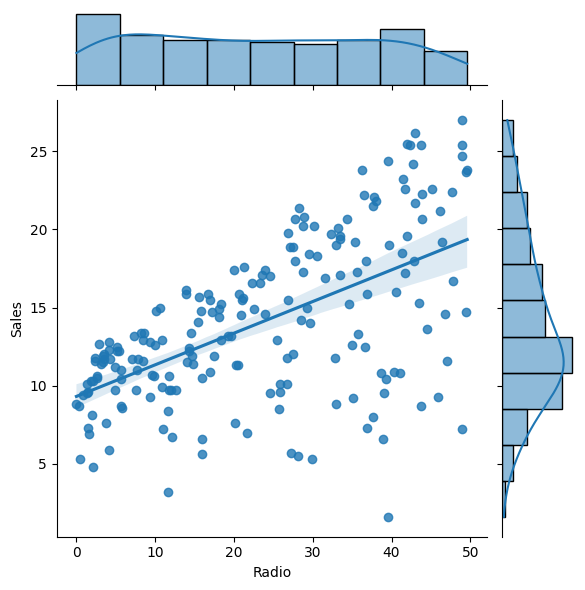

In [13]:
sns.jointplot(x='Radio' ,y ='Sales' ,data=df,kind='reg')

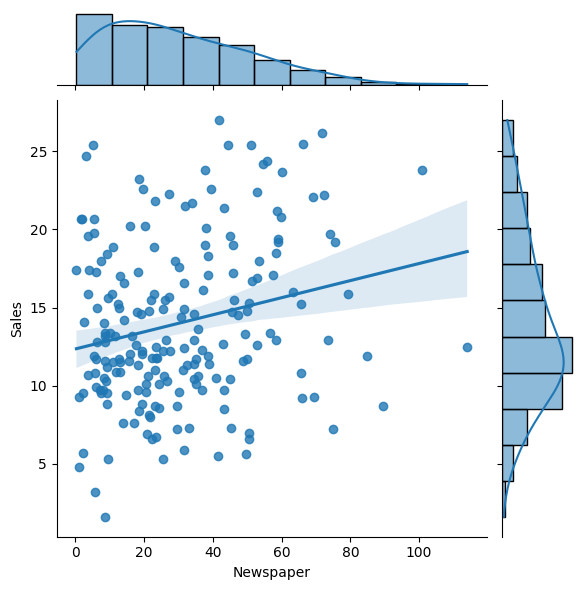

In [14]:
sns.jointplot(x='Newspaper' , y='Sales' , data=df,kind='reg')

## Correlation matrix

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

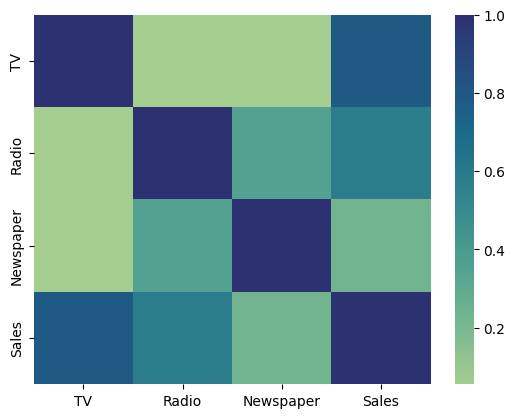

In [16]:
sns.heatmap(df.corr(),cmap='crest')

### Training and testing data

In [17]:
X=df.iloc[: ,:-1]
Y=df.iloc[: ,-1]

In [18]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=101)

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 3)
(140, 3)
(60, 3)


In [23]:
print("X_train: ")
print(X_train.head())
print()
print("X_test: ")
print(X_test.head())
print()
print("Y_train: ")
print(Y_train.head())
print()
print("Y_test: ")
print(Y_test.head())

X_train: 
        TV  Radio  Newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8

X_test: 
        TV  Radio  Newspaper
37    74.7   49.4       45.7
109  255.4   26.9        5.5
31   112.9   17.4       38.6
89   109.8   47.8       51.4
66    31.5   24.6        2.2

Y_train: 
85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: Sales, dtype: float64

Y_test: 
37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: Sales, dtype: float64


### Machine Learning Algorithm : XGBRegressor

In [24]:
from xgboost import XGBRegressor

In [25]:
model=XGBRegressor()

### Training model

In [26]:
model.fit(X_train  , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Making prediction

In [27]:
pred=model.predict(X_test)

### Checking accuracy

In [28]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score

In [29]:
mae=mean_absolute_error(Y_test , pred)
mse=mean_squared_error(Y_test , pred)
r2=r2_score(Y_test , pred)

print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

print("r2 score: {}".format(r2))

Mean absolute error: 0.7224330361684163
Mean squared error: 0.7954132317069835
r2 score: 0.9718259912758572


### Building predictive model

In [ ]:
tv=float(input("Cost of TV : "))
radio=float(input("Cost of Radio : "))
newspaper=float(input("Cost of newspaper : "))

arr=[tv , radio , newspaper]
arr=np.array(arr)
arr=arr.reshape(1 , -1)

result=model.predict(arr)
print("Sales : {}".format(result))